## Cálculo de estadísticas desde lista con Value Error

In [42]:
import numpy as np

def calculate(list):
    if len(list) < 9:
        raise ValueError("List must contain nine numbers.")
    else:
        arr = np.array(list).reshape(3, 3)
        return {'mean': [arr.mean(axis=0).tolist(), arr.mean(axis=1).tolist(), arr.mean().tolist()], 'variance': [arr.var(axis=0).tolist(), arr.var(axis=1).tolist(), arr.var().tolist()], 'standard deviation': [arr.std(axis=0).tolist(), arr.std(axis=1).tolist(), arr.std().tolist()],'max': [arr.max(axis=0).tolist(), arr.max(axis=1).tolist(), arr.max().tolist()],'min': [arr.min(axis=0).tolist(), arr.min(axis=1).tolist(), arr.min().tolist()],'sum': [arr.sum(axis=0).tolist(), arr.sum(axis=1).tolist(), arr.sum().tolist()]}

In [43]:
calculate([2,6,2,8,4,0,1,5,8])

{'mean': [[3.6666666666666665, 5.0, 3.3333333333333335],
  [3.3333333333333335, 4.0, 4.666666666666667],
  4.0],
 'variance': [[9.555555555555557, 0.6666666666666666, 11.555555555555555],
  [3.555555555555556, 10.666666666666666, 8.222222222222221],
  7.777777777777778],
 'standard deviation': [[3.091206165165235,
   0.816496580927726,
   3.39934634239519],
  [1.8856180831641267, 3.265986323710904, 2.8674417556808756],
  2.788866755113585],
 'max': [[8, 6, 8], [6, 8, 8], 8],
 'min': [[1, 4, 0], [2, 0, 1], 0],
 'sum': [[11, 15, 10], [10, 12, 14], 36]}

## Medical records

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv(r'C:\Users\Martu\Downloads\medical.csv')

# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) <= 25).astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0 
df.loc[df['cholesterol'] > 0, 'cholesterol'] = 1 
df.loc[df['gluc'] == 1, 'gluc'] = 0 
df.loc[df['gluc'] > 0, 'gluc'] = 1 

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat["total"] = 1
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index =False).count()
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue ="value", kind = "bar", col = "cardio").fig
        
   # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr(method = "pearson")

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12)) 
    
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt =".1f",center =0.08,cbar_kws = {"shrink":0.5})
#     linewidth for the white gap (clearer)
#     vmin = -0.1, vmax = 0.3, this is not needed
#     had to use fmt =".1f", cant use round on corr or it will ruin the triangle
#     square otherwise recentagle for each box
#     center 

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

In [122]:
draw_cat_plot()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,19106
9,0,overweight,1,15915


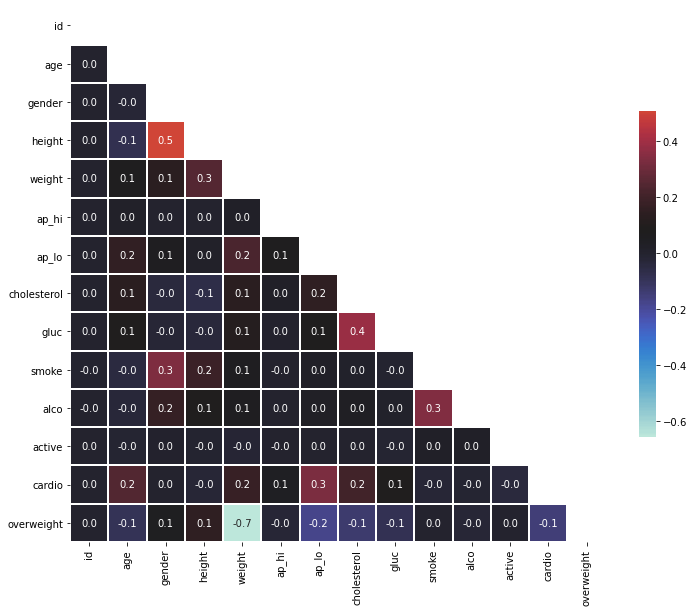

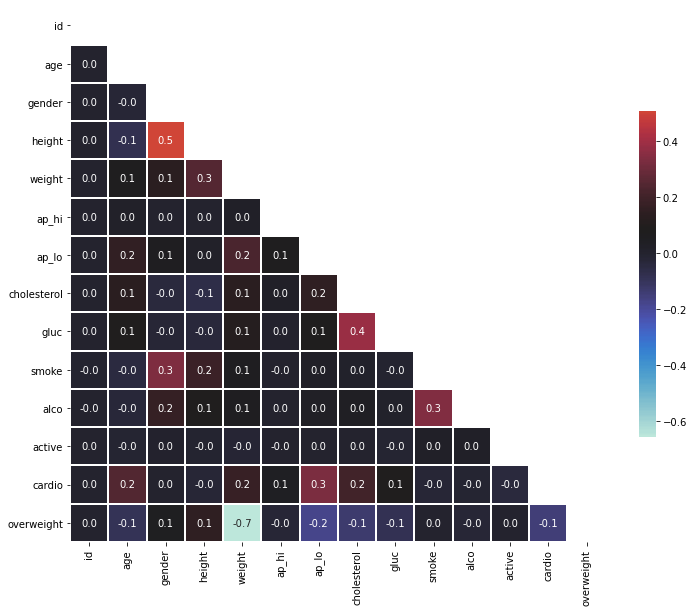

In [7]:
draw_heat_map()

## Page View Time Series Visualizer

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r'C:\Users\Martu\Downloads\file.csv', index_col='date')

# Clean data
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

def draw_line_plot():
    # Draw line plot
    fig, axes = plt.subplots(figsize=(12,6))
    axes.plot(df['value'].index, df['value'], color='red')
    axes.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = pd.read_csv(r'C:\Users\Martu\Downloads\file.csv')
    df_bar = df_bar[(df_bar['value'] <= df_bar['value'].quantile(0.975)) & (df_bar['value'] >= df_bar['value'].quantile(0.025))]
    dates = df_bar['date'].str.split(pat='-', expand=True)
    df_bar['Years'] = dates[0]
    df_bar['Months'] = dates[1]
    df_bar['Days'] = dates[2]
    
    df_bar.loc[df_bar['Months']=='01', 'Months'] = 'January'
    df_bar.loc[df_bar['Months']=='02', 'Months'] = 'February'
    df_bar.loc[df_bar['Months']=='03', 'Months'] = 'March'
    df_bar.loc[df_bar['Months']=='04', 'Months'] = 'April'
    df_bar.loc[df_bar['Months']=='05', 'Months'] = 'May'
    df_bar.loc[df_bar['Months']=='06', 'Months'] = 'June'
    df_bar.loc[df_bar['Months']=='07', 'Months'] = 'July'
    df_bar.loc[df_bar['Months']=='08', 'Months'] = 'August'
    df_bar.loc[df_bar['Months']=='09', 'Months'] = 'September'
    df_bar.loc[df_bar['Months']=='10', 'Months'] = 'October'
    df_bar.loc[df_bar['Months']=='11', 'Months'] = 'November'
    df_bar.loc[df_bar['Months']=='12', 'Months'] = 'December'
    
    # Draw bar plot
    fig = sns.catplot(x="Years", y="value", data = df_bar, kind = "bar", legend=False, hue="Months", ci=None, hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).fig
    plt.ylabel("Average Page Views")
    plt.legend(loc='upper left', title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = pd.read_csv(r'C:\Users\Martu\Downloads\file.csv')
    df_box = df_box[(df_box['value'] <= df_box['value'].quantile(0.975)) & (df_box['value'] >= df_box['value'].quantile(0.025))]
    dates = df_box['date'].str.split(pat='-', expand=True)
    df_box['Year'] = dates[0]
    df_box['Month'] = dates[1]
    
    df_box.loc[df_box['Month']=='01', 'Month'] = 'Jan'
    df_box.loc[df_box['Month']=='02', 'Month'] = 'Feb'
    df_box.loc[df_box['Month']=='03', 'Month'] = 'Mar'
    df_box.loc[df_box['Month']=='04', 'Month'] = 'Apr'
    df_box.loc[df_box['Month']=='05', 'Month'] = 'May'
    df_box.loc[df_box['Month']=='06', 'Month'] = 'Jun'
    df_box.loc[df_box['Month']=='07', 'Month'] = 'Jul'
    df_box.loc[df_box['Month']=='08', 'Month'] = 'Aug'
    df_box.loc[df_box['Month']=='09', 'Month'] = 'Sep'
    df_box.loc[df_box['Month']=='10', 'Month'] = 'Oct'
    df_box.loc[df_box['Month']=='11', 'Month'] = 'Nov'
    df_box.loc[df_box['Month']=='12', 'Month'] = 'Dec'
    
    # Draw box plots (using Seaborn) 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
    fig1 = sns.boxplot(y='value', x='Year', data=df_box, ax=ax1)
    fig1.set(ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")
    fig2= sns.boxplot(y='value', x='Month', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    fig2.set(ylabel = "Page Views", title = "Month-wise Box Plot (Seasonality)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


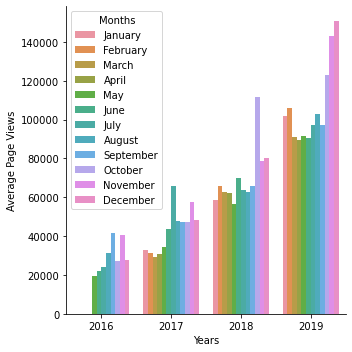

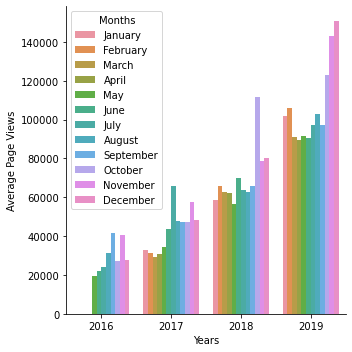

In [161]:
draw_bar_plot()


## Sea level predictor

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv(r'C:\Users\Martu\Downloads\grap.csv')

    # Create scatter plot
    df.plot.scatter(x='Year', y="CSIRO Adjusted Sea Level")

    # Create first line of best fit
    years_ext = np.arange(1880, 2050, 1)
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
    plt.plot(years_ext, (intercept1 + slope1*years_ext), 'r')
       
    # Create second line of best fit
    df2 = df[df['Year']>1999]
    years_ext2 = np.arange(2000, 2050, 1)
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x=df2['Year'], y=df2['CSIRO Adjusted Sea Level'])
    plt.plot(years_ext2, (intercept2 + slope2*years_ext2), 'y')
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
        
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()


<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

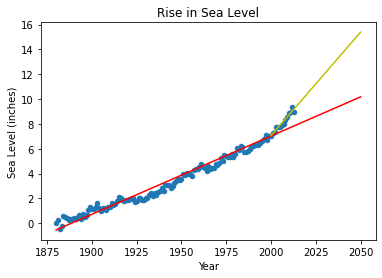

In [89]:
draw_plot()